<a href="https://colab.research.google.com/github/yumeean/CS482/blob/main/CS_482_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install Prophet
!pip install nest_asyncio

# Get BTC Data

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
TRAINING_START_DATE = '2017-01-01'

In [ ]:
bitcoin_df = yf.download('BTC-USD', start=TRAINING_START_DATE, end='2021-12-01')
bitcoin_df["Date"] = bitcoin_df.index

[*********************100%***********************]  1 of 1 completed


In [ ]:
split_date ='2021-11-01'
bitcoin_df_training = bitcoin_df.loc[bitcoin_df['Date'] < split_date]
bitcoin_df_test = bitcoin_df.loc[bitcoin_df['Date'] >= split_date]

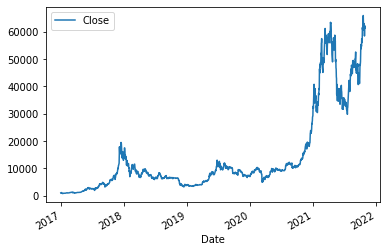

In [ ]:
bitcoin_df_training.plot(x='Date', y='Close')

# Facebook Prophet

In [ ]:
from prophet import Prophet

In [ ]:
def parse_df_for_prophet(df):
  new_df = df.drop(['Open', 'Volume', 'Low', 'Close', 'Adj Close'], axis=1)
  new_df.columns= ['y', 'ds']
  return new_df

In [ ]:
prophet_training = parse_df_for_prophet(bitcoin_df_training)
prophet_test = parse_df_for_prophet(bitcoin_df_test)
prophet_training.tail(10)

,y,ds
Date,,
2021-10-22,63715.023438,2021-10-22
2021-10-23,61743.878906,2021-10-23
2021-10-24,61505.804688,2021-10-24
2021-10-25,63729.324219,2021-10-25
2021-10-26,63229.027344,2021-10-26
2021-10-27,61435.183594,2021-10-27
2021-10-28,62128.632812,2021-10-28
2021-10-29,62927.609375,2021-10-29
2021-10-30,62330.144531,2021-10-30


In [ ]:
model = Prophet()
model.fit(prophet_training)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=31, freq='D')
prices = model.predict(future)

In [ ]:
prices.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1787,2021-11-27,62947.995189,55066.059982,66841.008764,62900.084030,63038.947680,-1985.414957,-1985.414957,-1985.414957,-33.811224,-33.811224,-33.811224,-1951.603733,-1951.603733,-1951.603733,0.0,0.0,0.0,60962.580232
1788,2021-11-28,63049.449193,54735.461901,67250.562523,62995.613967,63148.627029,-1908.644747,-1908.644747,-1908.644747,-41.458060,-41.458060,-41.458060,-1867.186687,-1867.186687,-1867.186687,0.0,0.0,0.0,61140.804446
1789,2021-11-29,63150.903197,54895.655022,67768.552034,63088.214246,63258.108917,-1735.095755,-1735.095755,-1735.095755,53.821784,53.821784,53.821784,-1788.917539,-1788.917539,-1788.917539,0.0,0.0,0.0,61415.807442
1790,2021-11-30,63252.357201,55272.479634,68043.188189,63183.620021,63368.205760,-1743.338704,-1743.338704,-1743.338704,-25.991853,-25.991853,-25.991853,-1717.346851,-1717.346851,-1717.346851,0.0,0.0,0.0,61509.018497
1791,2021-12-01,63353.811205,55150.681901,68082.073491,63279.824593,63476.246511,-1639.426710,-1639.426710,-1639.426710,13.271311,13.271311,13.271311,-1652.698021,-1652.698021,-1652.698021,0.0,0.0,0.0,61714.384495


In [ ]:
prices[['ds', 'yhat']]

,ds,yhat
0,2017-01-01,-2146.270723
1,2017-01-02,-1805.212163
2,2017-01-03,-1656.961289
3,2017-01-04,-1409.765090
4,2017-01-05,-1240.736493
...,...,...
1787,2021-11-27,60962.580232
1788,2021-11-28,61140.804446
1789,2021-11-29,61415.807442
1790,2021-11-30,61509.018497


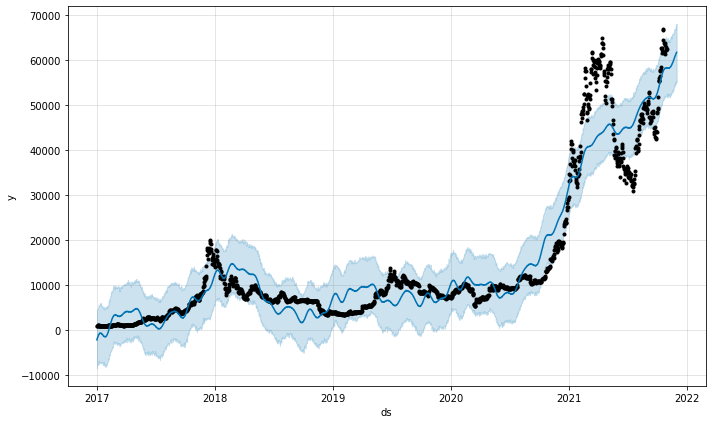

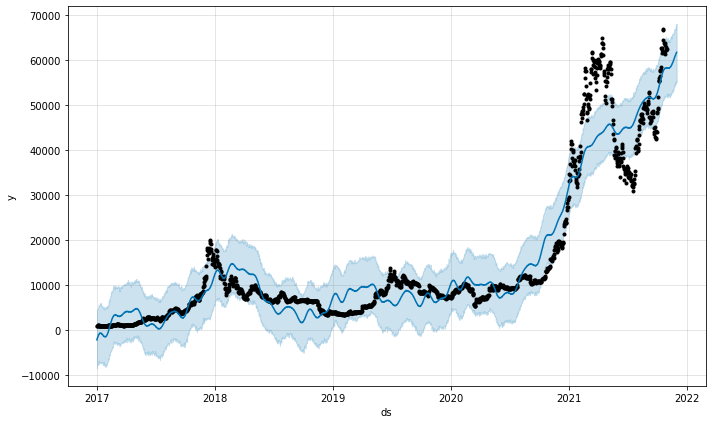

In [ ]:
model.plot(prices)

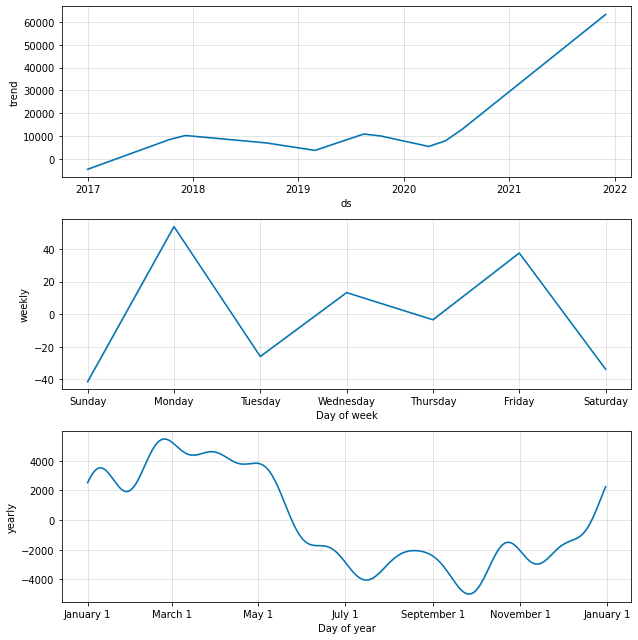

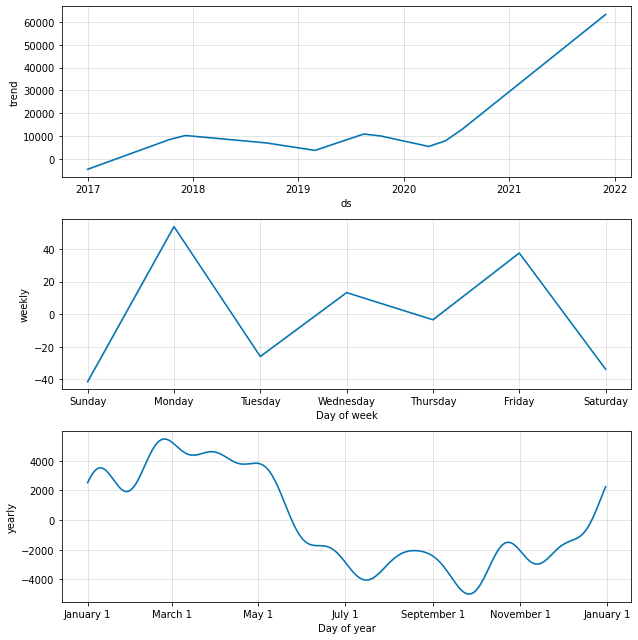

In [ ]:
model.plot_components(prices)


## Prophet
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.  

Facebook Prophet is an open-source algorithm for generating time-series models that uses a few old ideas with some new twists. It is particularly good at modeling time series that have multiple seasonalities and doesn’t face some of the above drawbacks of other algorithms. At its core is the sum of three functions of time plus an error term: `growth g(t)`, `seasonality s(t)`, holidays `h(t)` , and error `e_t` :  

$$ y(t) = g(t) + s(t) + h(t) + ϵ $$  

In terms of the trend model, Prophet implements 2 trend models that cover most real world applications: The nonlinear and linear growth functions.  

1. The nonlinear growth function is modeled by the logistic growth model. 
This setting is useful when your time series has a cap or a floor in which the values you are modeling becomes saturated and can’t surpass a maximum or minimum value (think carrying capacity). When logistic growth is used, the growth term will look similar to a typical equation for a logistic curve (see below), except it the carrying capacity (C) will vary as a function of time and the growth rate (k) and the offset(m) are variable and will change value at each change point. 
2. The linear growth function is modeled by a linear equation. It uses a set of piecewise linear equations with differing slopes between change points. When linear growth is used, the growth term will look similar to the classic `y = mx + b` from middle school, except the slope(m) and offset(b) are variable and will change value at each changepoint.

Trend changes are also incorporated using changepoints. Changepoints are points at which the growth rate is allowed to change. They can be specified by the user who provides a known set of dates of growth altering events such as product launches, or they will be selected automatically. 

The seasonality function is simply a Fourier Series as a function of time. If you are unfamiliar with Fourier Series, an easy way to think about it is the sum of many successive sines and cosines. Each sine and cosine term is multiplied by some coefficient. This sum can approximate nearly any curve or in the case of Facebook Prophet, the seasonality (cyclical pattern) in our data.

The holiday function allows Facebook Prophet to adjust forecasting when a holiday or major event may change the forecast. It takes a list of dates (there are built-in dates of US holidays or you can define your own dates) and when each date is present in the forecast adds or subtracts value from the forecast from the growth and seasonality terms based on historical data on the identified holiday dates. You can also identify a range of days around dates (think the time between Christmas/New Years, holiday weekends, thanksgiving’s association with Black Friday/Cyber Monday, etc).

# LSTM


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [ ]:
bitcoin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1792.0,1.492411e+04,1.655631e+04,7.751780e+02,5.333180e+03,8.535900e+03,1.282353e+04,6.754973e+04
High,1792.0,1.534058e+04,1.702387e+04,8.233070e+02,5.503425e+03,8.724289e+03,1.316734e+04,6.878962e+04
Low,1792.0,1.447578e+04,1.603408e+04,7.557560e+02,5.233561e+03,8.270207e+03,1.190655e+04,6.638206e+04
Close,1792.0,1.495292e+04,1.657866e+04,7.777570e+02,5.347516e+03,8.556607e+03,1.290728e+04,6.756683e+04
Adj Close,1792.0,1.495292e+04,1.657866e+04,7.777570e+02,5.347516e+03,8.556607e+03,1.290728e+04,6.756683e+04
Volume,1792.0,2.067672e+10,2.116181e+10,6.085170e+07,4.501762e+09,1.584647e+10,3.206307e+10,3.509679e+11


In [ ]:
a = bitcoin_df["Close"].fillna(method="backfill")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

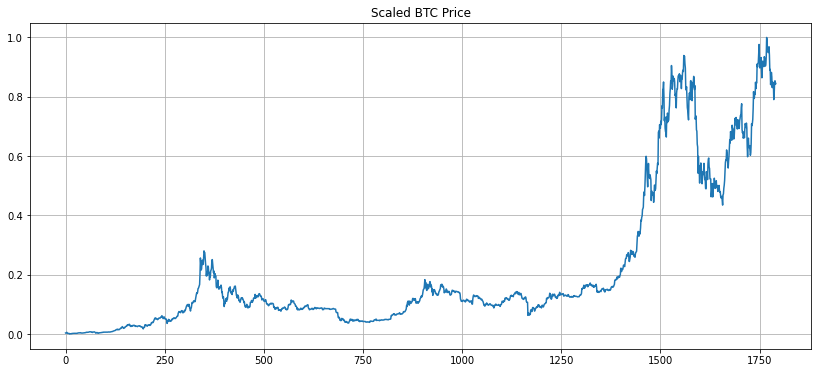

In [ ]:
close_price = np.array(a).reshape(-1,1)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled BTC Price")
plt.grid()
plt.plot(close_priceSC)

In [ ]:
X = []
y = []
for i in range(60, len(close_priceSC)):
    X.append(close_priceSC[i-60:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(1732, 60) (1732,)


In [ ]:
X_train = X[:1212,:]
X_test = X[1212:,:]

y_train = y[:1212]
y_test = y[1212:]

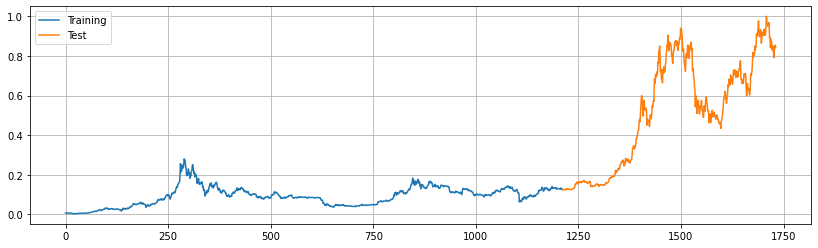

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(range(1212),y_train)
plt.plot(range(1212, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [ ]:
X_train = X_train.reshape(-1,60,1)
X_test = X_test.reshape(-1,60,1)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_absolute_error')
regressor.fit(X_train, y_train, epochs=20, batch_size=25)

Epoch 1/20
49/49 [==============================] - 14s 131ms/step - loss: 0.0259
Epoch 2/20
49/49 [==============================] - 6s 130ms/step - loss: 0.0198
Epoch 3/20
49/49 [==============================] - 6s 131ms/step - loss: 0.0171
Epoch 4/20
49/49 [==============================] - 6s 131ms/step - loss: 0.0162
Epoch 5/20
49/49 [==============================] - 6s 132ms/step - loss: 0.0150
Epoch 6/20
49/49 [==============================] - 6s 129ms/step - loss: 0.0135
Epoch 7/20
49/49 [==============================] - 6s 130ms/step - loss: 0.0133
Epoch 8/20
49/49 [==============================] - 6s 131ms/step - loss: 0.0135
Epoch 9/20
49/49 [==============================] - 6s 130ms/step - loss: 0.0134
Epoch 10/20
49/49 [==============================] - 6s 131ms/step - loss: 0.0119
Epoch 11/20
49/49 [==============================] - 6s 131ms/step - loss: 0.0119
Epoch 12/20
49/49 [==============================] - 6s 130ms/step - loss: 0.0115
Epoch 13/20
49/49 [=====

In [ ]:
y_pred = regressor.predict(X_test)
MSE = mean_absolute_error(y_test, y_pred)

Text(0, 0.5, 'Price')

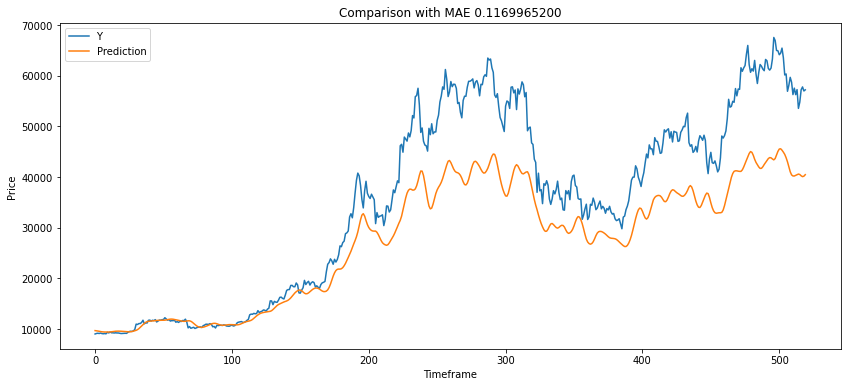

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

## LSTM

LSTM (Long short-term memory) is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

LSTM networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

### How do LSTM Networks Work?
Firstly, at a basic level, the output of an LSTM at a particular point in time is dependant on three things:
- The current long-term memory of the network — known as the cell state
- The output at the previous point in time — known as the previous hidden state
- The input data at the current time step
LSTMs use a series of ‘gates’ which control how the information in a sequence of data comes into, is stored in and leaves the network. There are three gates in a typical LSTM; forget gate, input gate and output gate. These gates can be thought of as filters and are each their own neural network.

#### Forget Gate
The first step in the process is the forget gate. Here we will decide which bits of the cell state (long term memory of the network) are useful given both the previous hidden state and new input data.

To do this, the previous hidden state and the new input data are fed into a neural network. This network generates a vector where each element is in the interval [0,1] (ensured by using the sigmoid activation). This network (within the forget gate) is trained so that it outputs close to 0 when a component of the input is deemed irrelevant and closer to 1 when relevant. It is useful to think of each element of this vector as a sort of filter/sieve which allows more information through as the value gets closer to 1.
These outputted values are then sent up and pointwise multiplied with the previous cell state. This pointwise multiplication means that components of the cell state which have been deemed irrelevant by the forget gate network will be multiplied by a number close to 0 and thus will have less influence on the following steps.
In summary, the forget gate decides which pieces of the long-term memory should now be forgotten (have less weight) given the previous hidden state and the new data point in the sequence.

#### Input Gate
The next step involves the new memory network and the input gate. The goal of this step is to determine what new information should be added to the networks long-term memory (cell state), given the previous hidden state and new input data.

Both the new memory network and the input gate are neural networks in themselves, and both take the same inputs, the previous hidden state and the new input data. It is worth noting that the inputs here are actually the same as the inputs to the forget gate!
- The new memory network is a tanh activated neural network which has learned how to combine the previous hidden state and new input data to generate a ‘new memory update vector’. This vector essentially contains information from the new input data given the context from the previous hidden state. This vector tells us how much to update each component of the long-term memory (cell state) of the network given the new data.

Note that we use a tanh here because its values lie in [-1,1] and so can be negative. The possibility of negative values here is necessary if we wish to reduce the impact of a component in the cell state.
- However, in part 1 above, where we generate the new memory vector, there is a big problem, it doesn’t actually check if the new input data is even worth remembering. This is where the input gate comes in. The input gate is a sigmoid activated network which acts as a filter, identifying which components of the ‘new memory vector’ are worth retaining. This network will output a vector of values in [0,1] (due to the sigmoid activation), allowing it to act as a filter through pointwise multiplication. Similar to what we saw in the forget gate, an output near zero is telling us we don’t want to update that element of the cell state.
- The output of parts 1 and 2 are pointwise multiplied. This causes the magnitude of new information we decided on in part 2 to be regulated and set to 0 if need be. The resulting combined vector is then added to the cell state, resulting in the long-term memory of the network being updated.

#### Output Gate
Now that our updates to the long-term memory of the network are complete, we can move to the final step, the output gate, deciding the new hidden state. To decide this, we will use three things; the newly updated cell state, the previous hidden state and the new input data.  

One might think that we could just output the updated cell state; however, this would be comparable to someone unloading everything they had ever learned about the stock market when only asked if they think it will go up or down tomorrow!  

To prevent this from happening we create a filter, the output gate, exactly as we did in the forget gate network. The inputs are the same (previous hidden state and new data), and the activation is also sigmoid (since we want the filter property gained from outputs in [0,1]).  

As mentioned, we want to apply this filter to the newly updated cell state. This ensures that only necessary information is output (saved to the new hidden state). However, before applying the filter, we pass the cell state through a tanh to force the values into the interval [-1,1].

The step-by-step process for this final step is as follows:
- Apply the tanh function to the current cell state pointwise to obtain the squished cell state, which now lies in [-1,1].
- Pass the previous hidden state and current input data through the sigmoid activated neural network to obtain the filter vector.
- Apply this filter vector to the squished cell state by pointwise multiplication.
- Output the new hidden state

## Conclusion
The 2 model worked well in this case, however given mode data we can create bigger batches that could lead into much more precise prediction for the BTC Price.
